In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import squarify

In [2]:
sns.set_theme()
%matplotlib inline

# Introduction


This analysis focuses on the Seattle Airbnb dataset available on Kaggle. To structure the investigation, I've chosen to employ the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology. This framework consists of six key phases:

- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

By following this systematic approach, the project aims to extract meaningful insights from the Seattle Airbnb data, addressing specific business questions and potentially uncovering valuable patterns in the short-term rental market of Seattle.

# Business Understanding


## Background
Airbnb, founded in 2008, is a leading platform in the hospitality industry, allowing property owners to rent out spaces to guests. The company's primary revenue comes from service fees charged to both guests and hosts.

## Key Data Points for Analysis
As data scientists aiming to improve Airbnb's business, we should focus on:

1. Pricing: Variations across neighborhoods, property types, and seasons
2. Property Characteristics: Types, room configurations, amenities
3. Host Information: Response rates, listing numbers, performance metrics
4. Reviews: Scores and comments indicating guest satisfaction and property quality
5. Location: Popularity of different Seattle neighborhoods

## Core Research Questions

1. Property Type Popularity:
   - What are the most popular property types in Seattle?

2. Property Type Pricing:
   - Which Seattle neighborhoods command the highest prices?
   - How do average prices vary by property type and location?

3. Seasonal Trends:
   - When are the peak visiting times for Seattle?
   - How significant are price fluctuations during these periods?
   - Do all property types follow similar seasonal trends?

By addressing these questions, we aim to provide actionable insights for Airbnb to optimize its operations in the Seattle market, enhancing both host and guest experiences while potentially increasing platform revenue.


# Data Understanding

Seattle Airbnb dataset consists of three files:

- `calendar.csv`: Contains listing IDs, dates, and corresponding prices for each day

- `reviews.csv`: Contains guest reviews for each listing, including comments and scores

- `listings.csv`: Includes detailed information about each listing, such as property type, location, and host details


In [3]:
calendar = pd.read_csv("./data/calendar.csv")
listings = pd.read_csv("./data/listings.csv")
reviews = pd.read_csv("./data/reviews.csv")

In [4]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


By quickly examining the data, we see that the `listings.csv` file contains the most comprehensive information for our analysis. It includes 92 columns, covering a wide range of attributes related to properties, hosts, and reviews.

For time series analysis and seasonal trends, we can use the `calendar.csv` file, which provides daily price data for each listing.

Finally, the `reviews.csv` file can be used to extract guest feedback and ratings, which are crucial for evaluating property quality and guest satisfaction.

# Prepare Data

## Drop unnecessary columns

In [7]:
listings_count = (
    listings[["id", "listing_url"]]
    .groupby("listing_url")
    .count()
    .sort_values(by="id", ascending=False)
)

listings_count[listings_count["id"] > 1]

,id
listing_url,


It seems that there are no duplicate listings in the dataset. So we could use id index as the primary key for the listings data.

In [8]:
listings = listings.set_index("id")

The first step is check if there are some columns has uninformative so we can drop them.

In [9]:
unique_columns = [col for col in listings.columns if listings[col].is_unique]
single_value_columns = [col for col in listings.columns if listings[col].nunique() <= 1]

listings = listings.drop(columns=unique_columns + single_value_columns)
listings.head()

,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,xl_picture_url,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,NaN,NaN,NaN,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89


Since the `listings.csv` file contains a large number of columns, we need to select the most relevant features for our analysis.

In [10]:
unused_columns = [
    "name",
    "summary",
    "space",
    "description",
    "neighborhood_overview",
    "notes",
    "transit",
    "thumbnail_url",
    "medium_url",
    "xl_picture_url",
    "host_url",
    "host_name",
    "host_since",
    "host_about",
    "host_thumbnail_url",
    "host_picture_url",
    "host_neighbourhood",
    "neighbourhood",
    "neighbourhood_cleansed",
]

listings = listings.drop(columns=unused_columns)

We drop all columns with more than 50% missing values and columns that are not informative for our analysis.

In [11]:
null_columns = [
    col for col in listings.columns if listings[col].isnull().sum() / len(listings) > 0.5
]

listings = listings.drop(columns=null_columns)

listings

,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
241032,956883,"Seattle, Washington, United States",within a few hours,96%,100%,f,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
953595,5177328,"Seattle, Washington, United States",within an hour,98%,100%,t,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
3308979,16708587,"Seattle, Washington, United States",within a few hours,67%,100%,f,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
7421966,9851441,"Seattle, Washington, United States",NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,...,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
278830,1452570,"Seattle, Washington, United States",within an hour,100%,NaN,f,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8101950,31148752,US,within a few hours,99%,100%,f,354.0,354.0,"['email', 'phone', 'linkedin', 'reviews', 'jum...",t,...,4.0,8.0,10.0,8.0,f,strict,f,f,8,0.30
8902327,46566046,"Seattle, Washington, United States",within an hour,100%,100%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,...,10.0,10.0,10.0,10.0,f,moderate,f,f,1,2.00
10267360,52791370,US,NaN,NaN,NaN,f,1.0,1.0,['phone'],t,...,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN


In [12]:
# Display each 10 column from listings

for i in range(0, len(listings.columns), 10):
    display(listings[listings.columns[i:i + 10]].head())

,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic
id,,,,,,,,,,
241032,956883,"Seattle, Washington, United States",within a few hours,96%,100%,f,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t
953595,5177328,"Seattle, Washington, United States",within an hour,98%,100%,t,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t
3308979,16708587,"Seattle, Washington, United States",within a few hours,67%,100%,f,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t
7421966,9851441,"Seattle, Washington, United States",NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t
278830,1452570,"Seattle, Washington, United States",within an hour,100%,NaN,f,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t


,host_identity_verified,street,neighbourhood_group_cleansed,city,state,zipcode,smart_location,is_location_exact,property_type,room_type
id,,,,,,,,,,
241032,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,Seattle,WA,98119,"Seattle, WA",t,Apartment,Entire home/apt
953595,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,Seattle,WA,98119,"Seattle, WA",t,Apartment,Entire home/apt
3308979,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,Seattle,WA,98119,"Seattle, WA",t,House,Entire home/apt
7421966,t,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,Seattle,WA,98119,"Seattle, WA",t,Apartment,Entire home/apt
278830,t,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,Seattle,WA,98119,"Seattle, WA",t,House,Entire home/apt


,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,cleaning_fee,guests_included
id,,,,,,,,,,
241032,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,2
953595,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,"$1,000.00",$40.00,1
3308979,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,NaN,$300.00,10
7421966,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,$650.00,NaN,1
278830,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,NaN,$125.00,6


,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review
id,,,,,,,,,,
241032,$5.00,1,365,4 weeks ago,14,41,71,346,207,2011-11-01
953595,$0.00,2,90,today,13,13,16,291,43,2013-08-19
3308979,$25.00,4,30,5 weeks ago,1,6,17,220,20,2014-07-30
7421966,$0.00,1,1125,6 months ago,0,0,0,143,0,NaN
278830,$15.00,1,1125,7 weeks ago,30,60,90,365,38,2012-07-10


,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
id,,,,,,,,,,
241032,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate
953595,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict
3308979,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict
7421966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
278830,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict


,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,
241032,f,f,2,4.07
953595,t,t,6,1.48
3308979,f,f,2,1.15
7421966,f,f,1,NaN
278830,f,f,1,0.89


## Normalize data

Since some columns are not in the right format, we need to normalize them.

In [13]:
for bool_column in [
    "host_is_superhost",
    "host_has_profile_pic",
    "host_identity_verified",
    "is_location_exact",
    "instant_bookable",
    "require_guest_profile_picture",
    "require_guest_phone_verification",
]:
    listings[bool_column] = listings[bool_column].map({"t": True, "f": False})

In [14]:
for rate_column in [
    "host_response_rate",
    "host_acceptance_rate",
]:
    listings[rate_column] = listings[rate_column].str.replace("%", "").astype(float)
    # Fill missing values with the median
    listings[rate_column] = listings[rate_column].fillna(listings[rate_column].median())
    listings[rate_column] = listings[rate_column] / 100

In [15]:
for price_column in [
    "price",
    "weekly_price",
    "cleaning_fee",
    "extra_people",
]:
    listings[price_column] = (
        listings[price_column]
        .apply(lambda x: x.replace("$", "").replace(",", "") if isinstance(x, str) else x)
        .astype(float)
    )

In [16]:
# Display each 10 column from listings

for i in range(0, len(listings.columns), 10):
    display(listings[listings.columns[i:i + 10]].head())

,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic
id,,,,,,,,,,
241032,956883,"Seattle, Washington, United States",within a few hours,0.96,1.0,False,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",True
953595,5177328,"Seattle, Washington, United States",within an hour,0.98,1.0,True,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",True
3308979,16708587,"Seattle, Washington, United States",within a few hours,0.67,1.0,False,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",True
7421966,9851441,"Seattle, Washington, United States",NaN,1.00,1.0,False,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",True
278830,1452570,"Seattle, Washington, United States",within an hour,1.00,1.0,False,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",True


,host_identity_verified,street,neighbourhood_group_cleansed,city,state,zipcode,smart_location,is_location_exact,property_type,room_type
id,,,,,,,,,,
241032,True,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,Seattle,WA,98119,"Seattle, WA",True,Apartment,Entire home/apt
953595,True,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,Seattle,WA,98119,"Seattle, WA",True,Apartment,Entire home/apt
3308979,True,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,Seattle,WA,98119,"Seattle, WA",True,House,Entire home/apt
7421966,True,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,Seattle,WA,98119,"Seattle, WA",True,Apartment,Entire home/apt
278830,True,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,Seattle,WA,98119,"Seattle, WA",True,House,Entire home/apt


,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,cleaning_fee,guests_included
id,,,,,,,,,,
241032,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,NaN,NaN,2
953595,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,1000.0,40.0,1
3308979,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,NaN,300.0,10
7421966,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,650.0,NaN,1
278830,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,NaN,125.0,6


,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review
id,,,,,,,,,,
241032,5.0,1,365,4 weeks ago,14,41,71,346,207,2011-11-01
953595,0.0,2,90,today,13,13,16,291,43,2013-08-19
3308979,25.0,4,30,5 weeks ago,1,6,17,220,20,2014-07-30
7421966,0.0,1,1125,6 months ago,0,0,0,143,0,NaN
278830,15.0,1,1125,7 weeks ago,30,60,90,365,38,2012-07-10


,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
id,,,,,,,,,,
241032,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,False,moderate
953595,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,False,strict
3308979,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False,strict
7421966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,flexible
278830,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,False,strict


,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,
241032,False,False,2,4.07
953595,True,True,6,1.48
3308979,False,False,2,1.15
7421966,False,False,1,NaN
278830,False,False,1,0.89


In [17]:
calendar["date"] = pd.to_datetime(calendar["date"])

calendar["price"] = (
    calendar["price"]
    .apply(lambda x: x.replace("$", "").replace(",", "") if isinstance(x, str) else x)
    .astype(float)
)

In [18]:
calendar["available"] = calendar["available"].map({"t": True, "f": False})

In [19]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


In [20]:
listing_available = calendar.groupby(["listing_id"])["available"].count().reset_index().sort_values(
    by="available", ascending=False
)

listing_available[listing_available["available"] < 365]

,listing_id,available


# Answering the questions

## Property Type Popularity

In [21]:
listings["property_type"].value_counts()

property_type
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: count, dtype: int64

By using the `value_counts()` method, we can see that there are many different property types. It seems that some of them are not very popular, so we can group them into a single category.

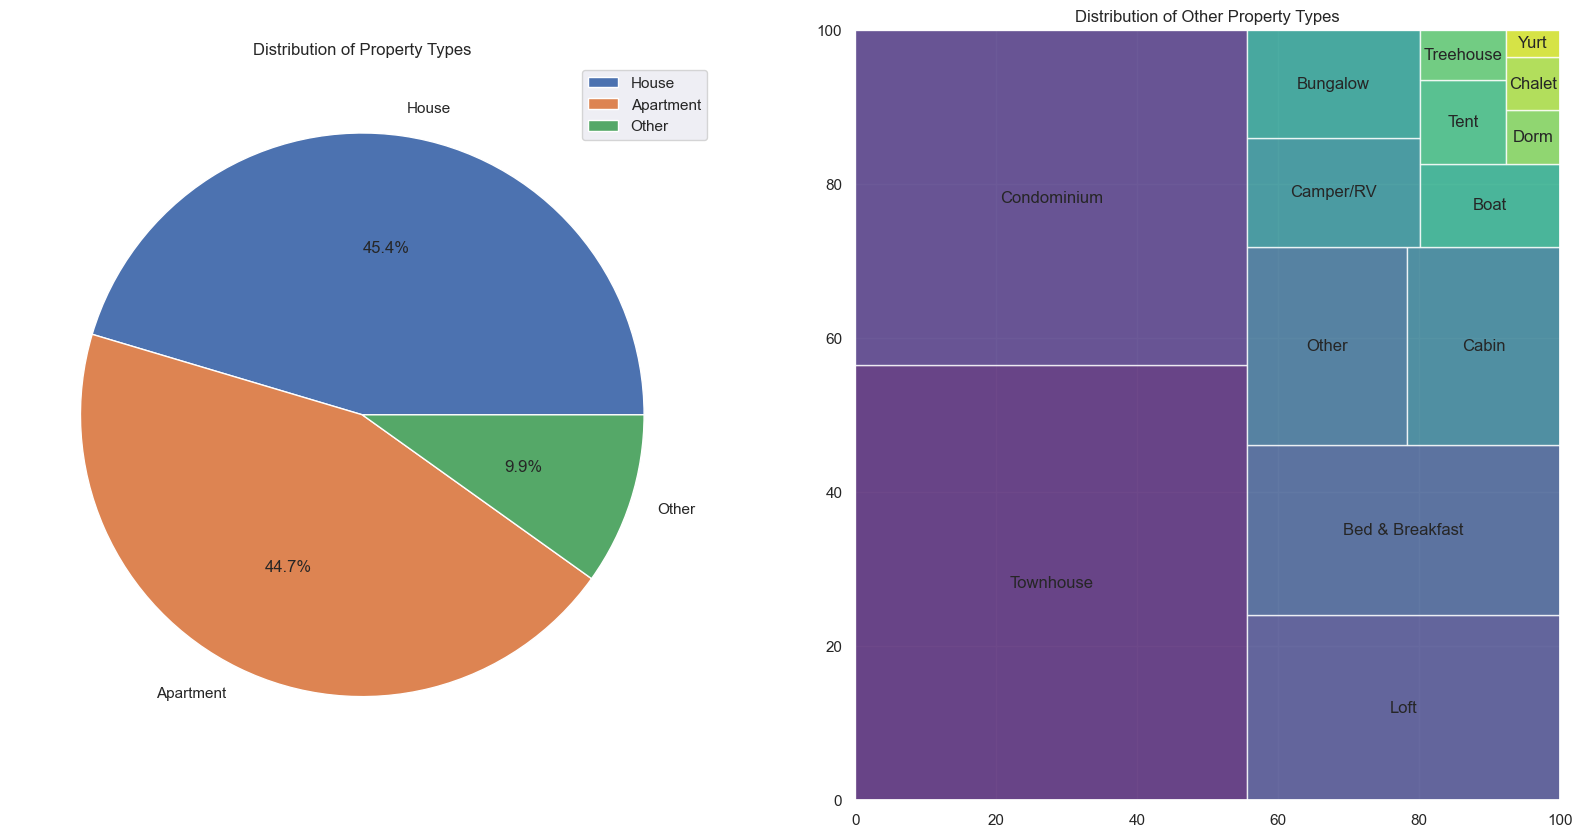

In [22]:
listings["property_type_group"] = listings["property_type"].apply(
    lambda x: (
        x
        if x
        in [
            "Apartment",
            "House",
        ]
        else "Other"
    ),
)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

listings["property_type_group"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    ylabel="",
    legend="best",
    ax=axs[0],
)
axs[0].title.set_text("Distribution of Property Types")

other_property_type_group_count = (
    listings[listings["property_type_group"] == "Other"]["property_type"]
    .value_counts()
    .reset_index()
)

squarify.plot(
    sizes=other_property_type_group_count["count"],
    label=other_property_type_group_count["property_type"],
    alpha=0.8,
    color=sns.color_palette("viridis", len(other_property_type_group_count)),
    ax=axs[1],
)

axs[1].title.set_text("Distribution of Other Property Types")
plt.show()

The pie chart on the left side of the figure represents the overall distribution of the primary property types available in Seattle. It shows that the majority of listings fall into two categories: 'House' and 'Apartment'. Each of these two property types accounts for around 45% of the total listings.

The remaining properties are grouped under the 'Other' category, which includes a variety of less common property types and we can see that the 'Other' category is quite diverse, with no single property type dominating the group. Even though there are some popular property types, such as 'Condominium' and 'Townhouse', but they are still relatively small compared to 'House' and 'Apartment'.

But are it is the same for each neighborhood?

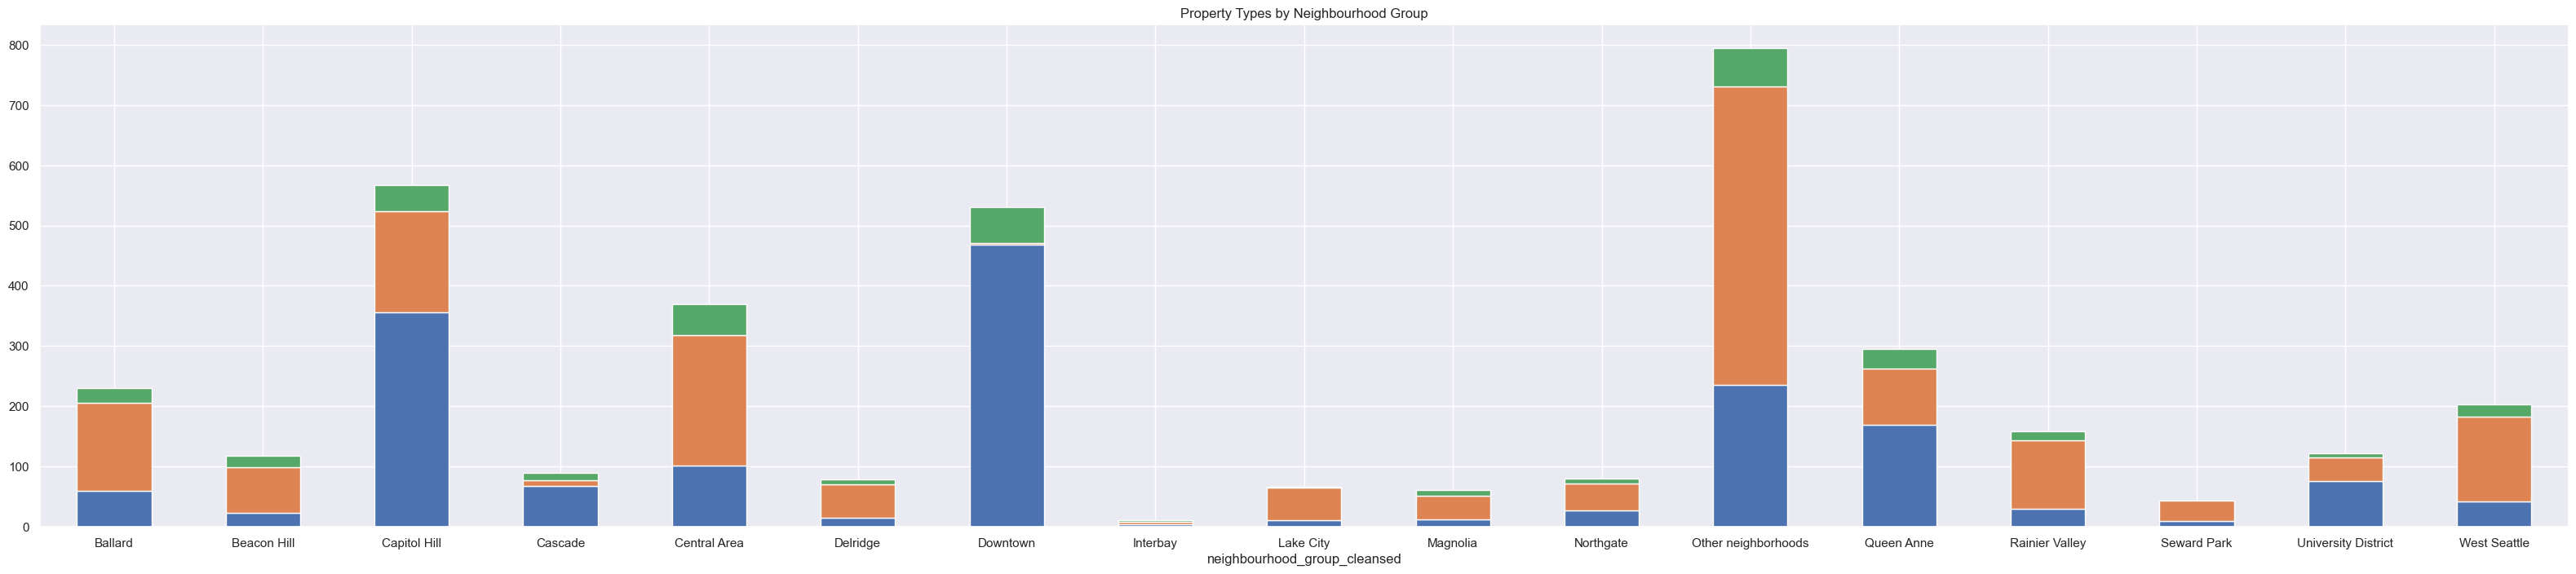

In [23]:
listings[["neighbourhood_group_cleansed", "property_type_group"]].reset_index().groupby(
    ["neighbourhood_group_cleansed", "property_type_group"]
).count().unstack().plot(
    kind="bar",
    stacked=True,
    figsize=(40, 8),
    title="Property Types by Neighbourhood Group",
    legend=False
)

plt.xticks(rotation=0)
plt.show()


The above figure tells us that the number of listings in each neighborhood is quite different. Since we are interested in the popularity of property types, we need to normalize the data by calculating the percentage of each property type in each neighborhood.

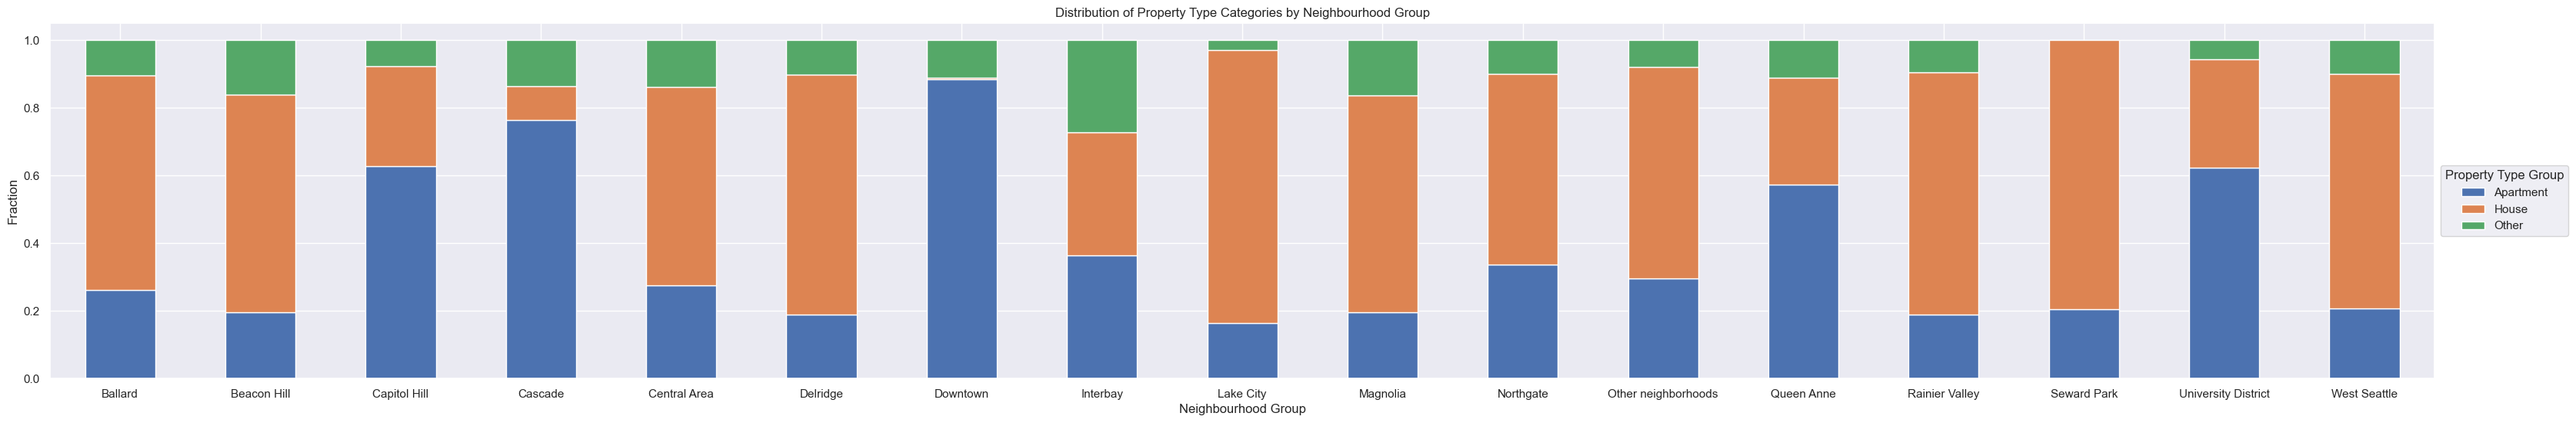

In [24]:
(
    listings.groupby("neighbourhood_group_cleansed")["property_type_group"]
    .value_counts(normalize=True)
    .unstack("property_type_group")
    .plot.bar(
        stacked=True,
        figsize=(40, 6),
        legend="best",
        ylabel="Fraction",
        xlabel="Neighbourhood Group",
        title="Distribution of Property Type Categories by Neighbourhood Group",
    )
)
plt.legend(
    title="Property Type Group",
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
)
plt.xticks(rotation=0)
plt.show()


In the provided figure, we observe that apartments and houses are the most common property types in all neighborhood groups. However, the distribution of property types varies slightly across different neighborhoods. For instance, Capital Hill, Cascade, Downtown, Queen Anne and the University District have a higher concentration of apartments, while areas like Seward Park and West Seattle have a more balanced or higher proportion of houses.

The "Other" category consistently represents a small fraction across all neighborhoods, suggesting it is a minor category overall.

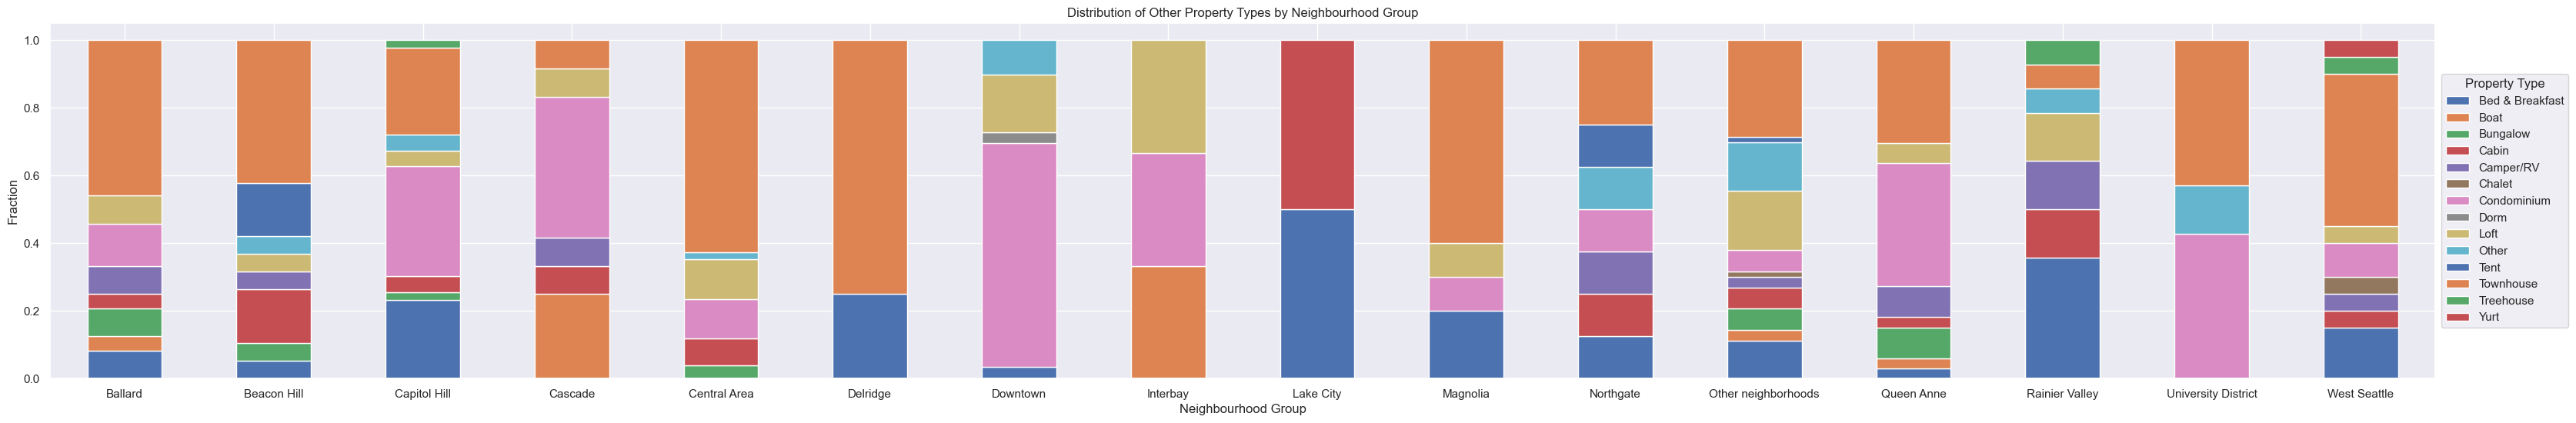

In [25]:
(
    listings[listings["property_type_group"] == "Other"]
    .groupby("neighbourhood_group_cleansed")["property_type"]
    .value_counts(normalize=True)
    .unstack("property_type")
    .plot.bar(
        stacked=True,
        figsize=(40, 6),
        ylabel="Fraction",
        xlabel="Neighbourhood Group",
        title="Distribution of Other Property Types by Neighbourhood Group"
    )
)
plt.legend(
    title="Property Type",
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
)
plt.legend(
    title="Property Type",
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
)
plt.xticks(rotation=0)
plt.show()

For Other property types, we can see that the distribution is different for each neighborhood. Town house and Condominium are the most popular property types but each neighborhood has a different distribution. For example, Central Area has a higher proportion of Townhouse listings, while Queen Anne has more Condominiums.

In conclusion, we could take some insights from the data:

- The number of listings in each neighborhood is quite different, most of the listings are in the Capitol Hill and Downtown neighborhoods. Other neighborhoods which are listed has under 250 listings. All of remaining neighborhoods are grouped into the 'Other neighborhoods' and they have approximately 800 listings.

- The most popular property types in Seattle are 'House' and 'Apartment', which account for around 45% of the total listings each. The 'Other' category includes a variety of less common property types, with no single type dominating the group.

- The distribution of property types varies slightly across different neighborhoods. For instance, Capital Hill, Cascade, Downtown, Queen Anne, and the University District have a higher concentration of apartments, while areas like Seward Park and West Seattle have a more balanced or higher proportion of houses.

- The 'Other' category consistently represents a small fraction across all neighborhoods, suggesting it is a minor category overall.

## Property Type Pricing

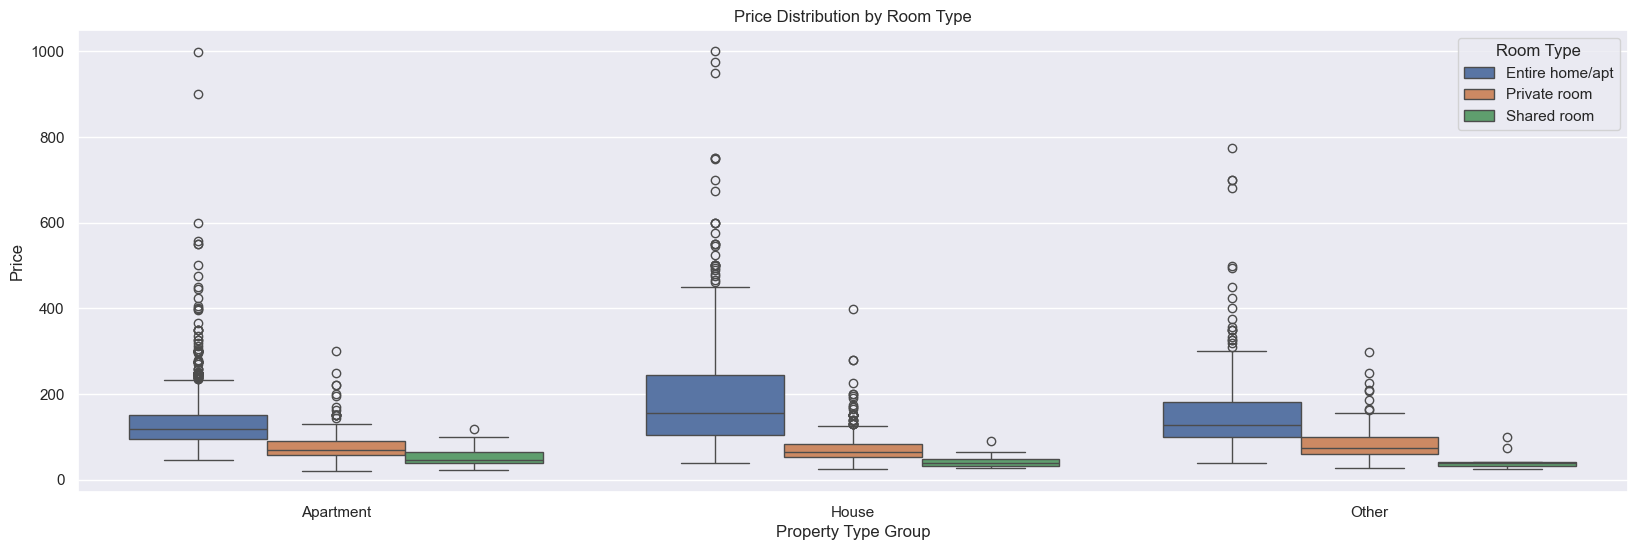

In [26]:
plt.subplots(figsize=(20, 6))

ax = sns.boxplot(
    x="property_type_group",
    hue="room_type",
    y="price",
    data=listings,
)
ax.title.set_text("Price Distribution by Room Type")
ax.set_xlabel("Property Type Group")
ax.set_ylabel("Price")
ax.legend(title="Room Type")
plt.show()

The chart above provides a detailed breakdown of property prices in Seattle’s Airbnb market, segmented by room type (Entire home/apt, Private room, and Shared room) and property type (Apartment, House, and Other). This analysis reveals important insights into how these factors influence pricing trends across different accommodation options.

For entire homes/apartments, we observe that this room type consistently commands the highest prices, regardless of the property type. Apartments listed as entire homes have a median price just below $200, with a significant number of outliers reaching up to $1,000. Most of these apartments are priced in the $100–$300 range. Houses with entire home listings show a similar price pattern, although the outliers are less extreme, maxing out around $600. The "Other" property types in this category also feature higher price points but exhibit a tighter and more compact price distribution, with fewer high-priced outliers.

In contrast, private rooms show a more moderate price range across all property types. Apartments in this category have a median price well below $100, with some outliers exceeding $200. Houses offering private rooms are generally slightly more expensive than apartments, with a median price also below $100 but with fewer outliers. The "Other" property type exhibits the tightest price distribution for private rooms, with most listings priced under $100 and very few exceptions.

When it comes to shared rooms, as expected, these listings are the most economical option across all property types. Shared rooms in both apartments and houses display narrow price ranges, clustering around very low price points. There are few significant outliers in this category, reflecting the lower cost and reduced privacy that come with this type of accommodation. The "Other" property type has the lowest overall price range for shared rooms, with most prices sitting comfortably below $50.

Overall, the chart clearly illustrates that entire homes/apartments tend to have the highest and most variable prices, offering guests exclusivity and privacy at a premium. Private rooms represent a middle ground, providing a more affordable option without sacrificing too much in terms of personal space. Finally, shared rooms are the budget-friendly alternative, appealing to travelers who are comfortable with shared living spaces and minimal privacy.

This data highlights the pricing dynamics of the Seattle Airbnb market and how the interplay between room type and property type significantly affects the overall cost of accommodation. Understanding these patterns can help both hosts and guests make more informed decisions when listing or booking properties on Airbnb.

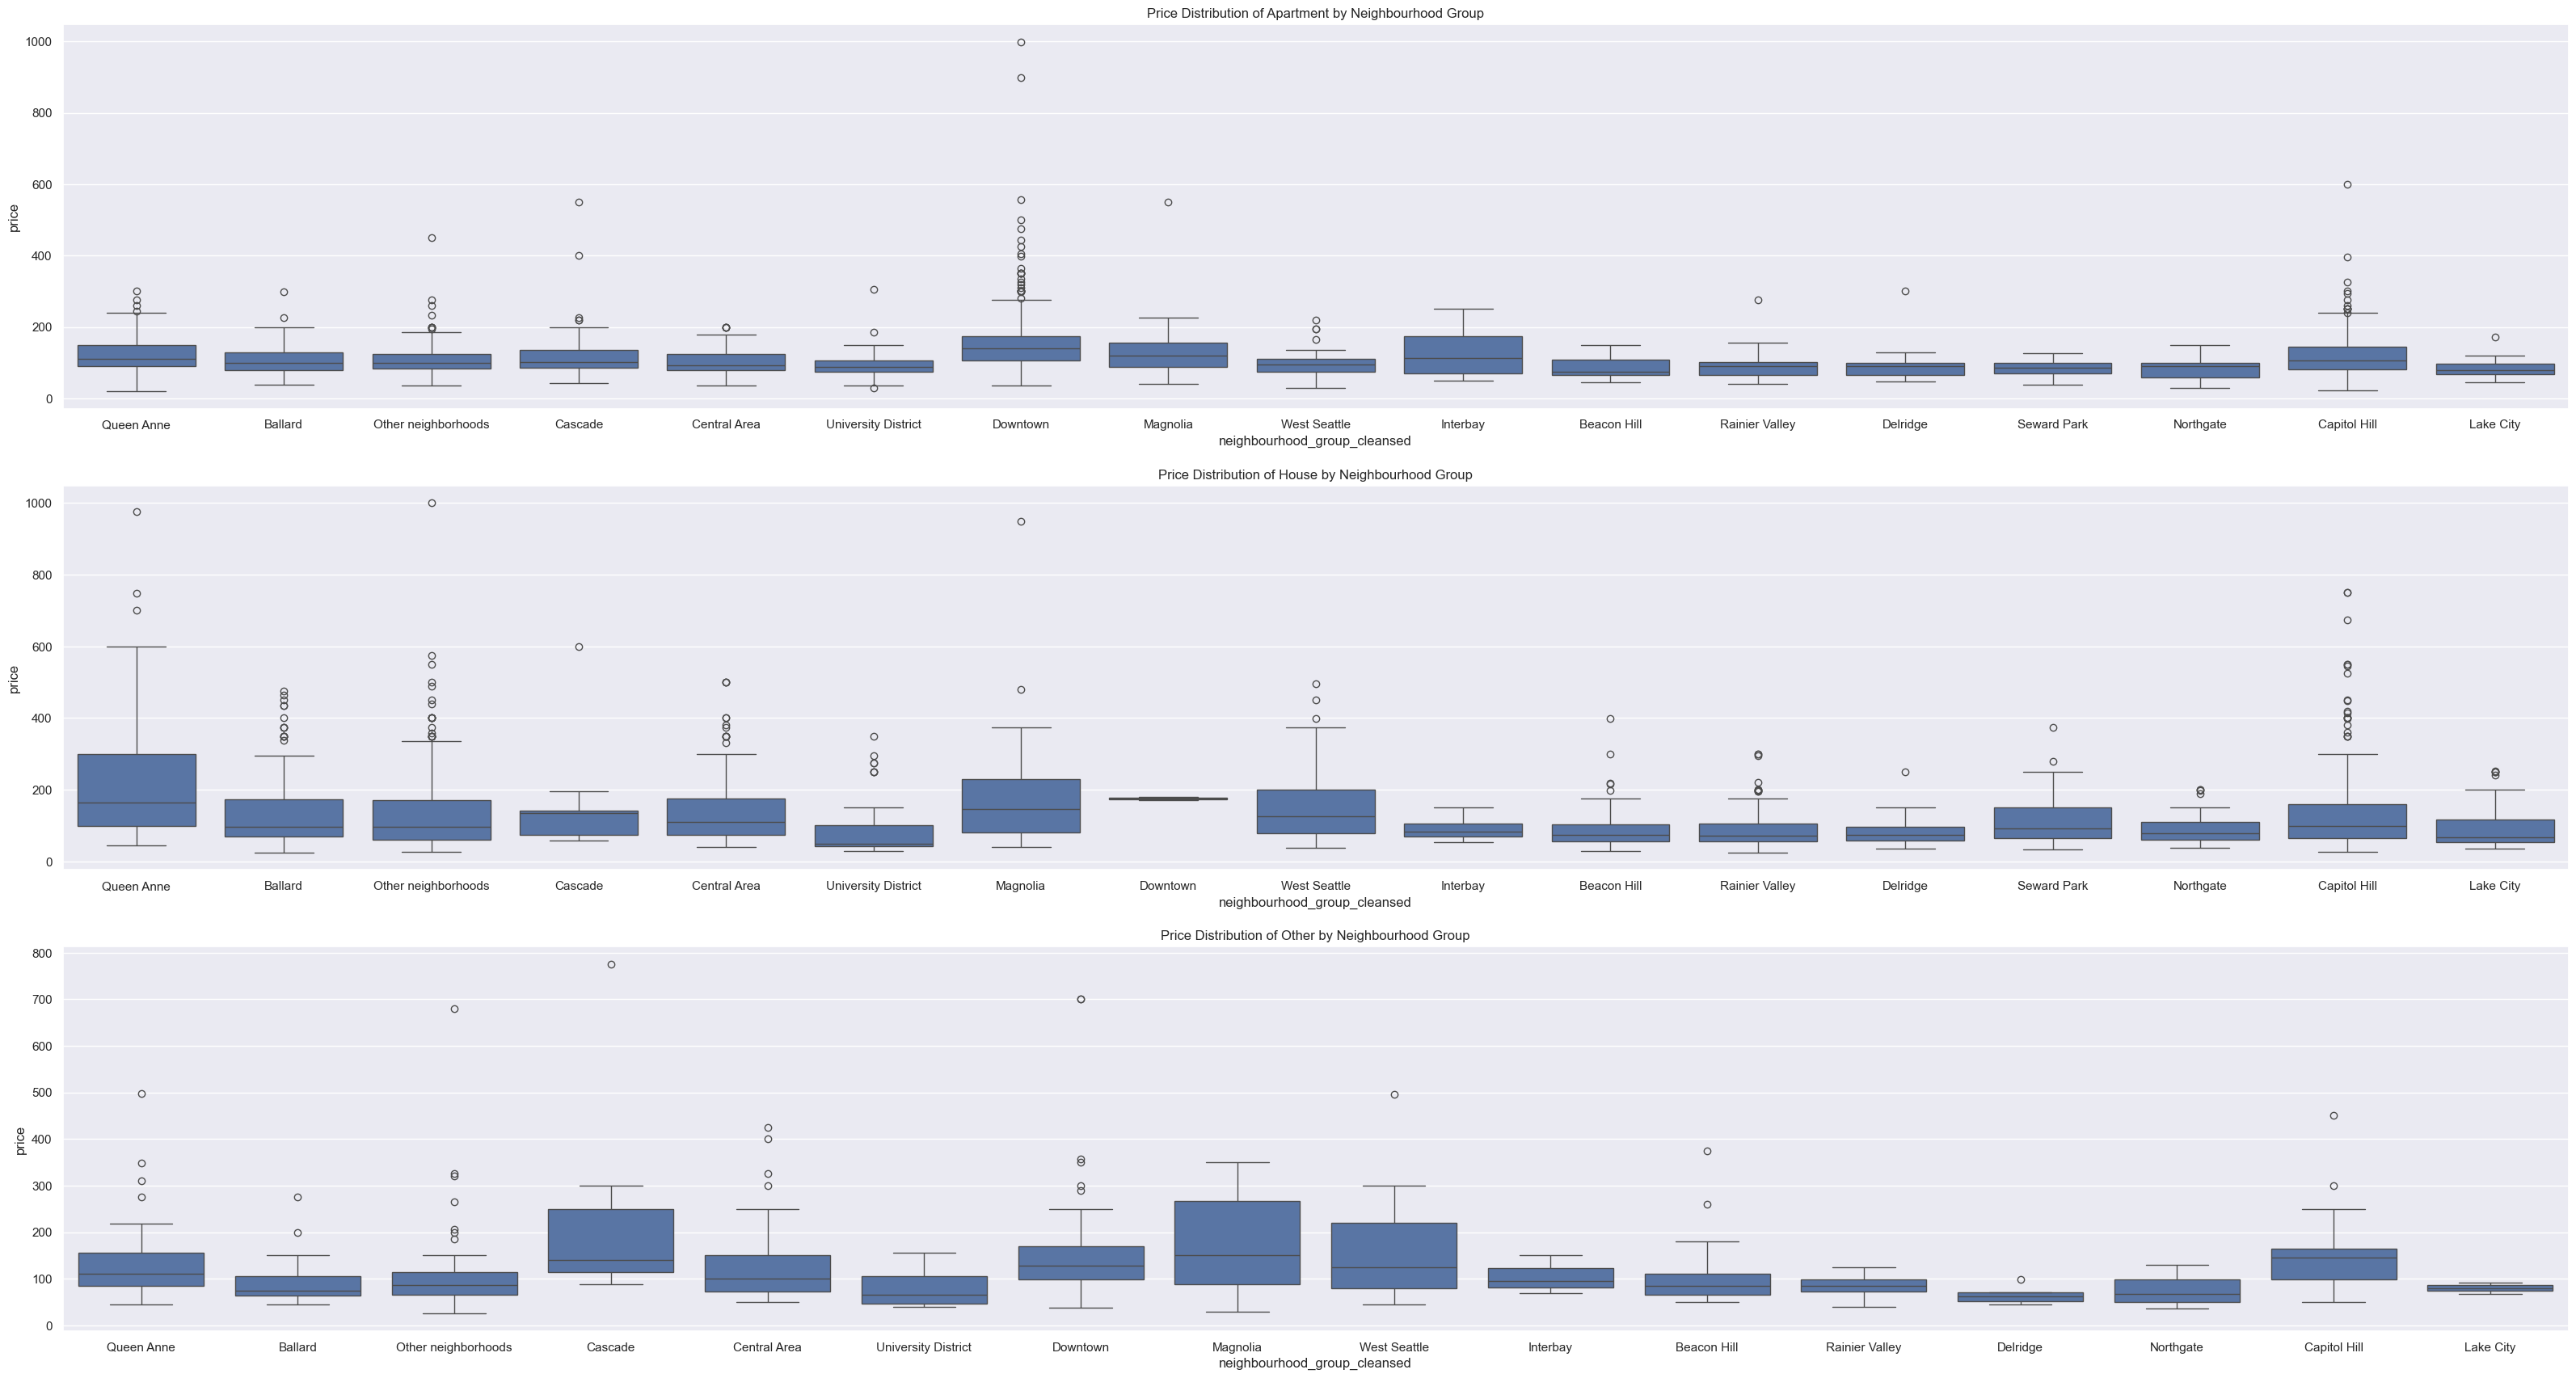

In [27]:
listings["property_type_group"].unique()

fig, axs = plt.subplots(len(listings["property_type_group"].unique()), 1, figsize=(40, 7 * len(listings["property_type_group"].unique())))

for i, property_type_group in enumerate(listings["property_type_group"].unique()):
    df = listings[listings["property_type_group"] == property_type_group]
    sns.boxplot(
        data=df,
        x="neighbourhood_group_cleansed",
        y="price",
        ax=axs[i],
    )
    axs[i].title.set_text(f"Price Distribution of {property_type_group} by Neighbourhood Group")


The boxplots provide a clear visual comparison of property price distributions for Airbnb rentals in different Seattle neighborhoods, categorized into two groups: apartments and houses. The first plot highlights the price distribution for apartments, showing a wide range of prices across neighborhoods. Downtown Seattle stands out as having the highest median apartment prices, accompanied by a large number of extreme outliers, indicating the presence of luxury properties or high-demand listings that significantly raise the average price. Other neighborhoods like Capitol Hill and Queen Anne also exhibit relatively high median prices for apartments but with fewer extreme outliers compared to Downtown, reflecting more stable pricing trends. In contrast, more affordable areas such as Delridge, Beacon Hill, and Seward Park show much lower median prices, with tighter price ranges and fewer outliers, suggesting a more predictable and consistent pricing pattern.

When analyzing house price distributions in the second plot, Downtown again emerges as the most expensive neighborhood, with a wide price spread and a significant number of outliers. However, Queen Anne is notable for having a particularly high number of outliers in house prices, suggesting that some properties in this neighborhood are priced much higher than the typical house in the area. Capitol Hill and Interbay also have relatively high house prices, though with fewer extreme deviations from the median. Neighborhoods like Delridge, Seward Park, and Beacon Hill maintain lower house prices, similar to the apartment price trends seen in these areas, reinforcing their status as more affordable regions within the city.


In terms of overall trends, the price variations between neighborhoods are substantial. The presence of significant outliers in upscale areas like Downtown, Queen Anne, and Capitol Hill suggests that property-specific factors, such as proximity to city centers, property size, or amenities, play a critical role in price determination. On the other hand, neighborhoods with fewer outliers and smaller price spreads, such as Beacon Hill, Delridge, and Seward Park, likely offer more standardized property options at lower costs.

## Seasonal Trends

For the seasonal analysis, we could use the `calendar.csv` file, which contains daily price data for each listing. By aggregating the price data across all listings, we can identify seasonal trends in Seattle's short-term rental market.

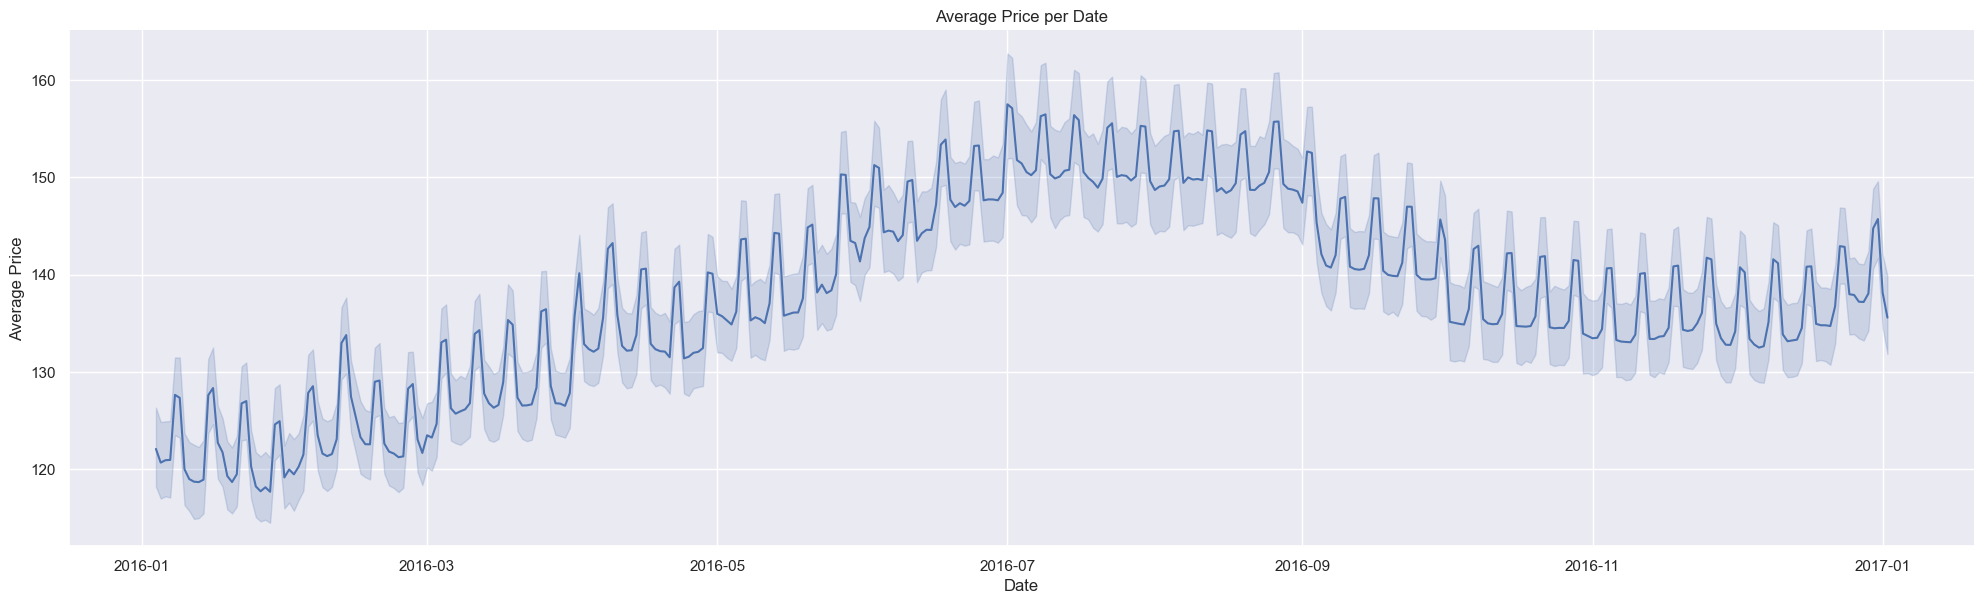

In [28]:
sns.relplot(
    data=calendar,
    x="date",
    y="price",
    kind="line",
    height=6, aspect=20/6
)

plt.title("Average Price per Date")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.show()

When looking at the above data, we can observe a clear seasonal pattern in average prices throughout 2016, marked by regular cycles of sharp increases and decreases. From January to mid-year (July), prices show a steady upward trend, reaching a peak during the summer months with an average price around 155. Following this peak, there is a gradual decline, with prices falling back to approximately 120 by the year's end. This cyclical behavior indicates a strong seasonal influence, where higher demand or pricing likely occurs in the summer, followed by a dip during the winter months. The consistent volatility, with periodic price drops, suggests fluctuations possibly driven by weekly or monthly market factors such as sales, demand shifts, or pricing strategies. The overall pattern reflects a typical seasonal trend with elevated summer prices and lower winter prices.

Thank for `startsmodels` library, we could use the seasonal decomposition of time series data to separate the data into trend, seasonal, and residual components. This analysis provides a more detailed view of the underlying patterns in the price data, allowing us to identify the specific seasonal effects that contribute to the overall price fluctuations.

In [29]:
! pip install statsmodels -q

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

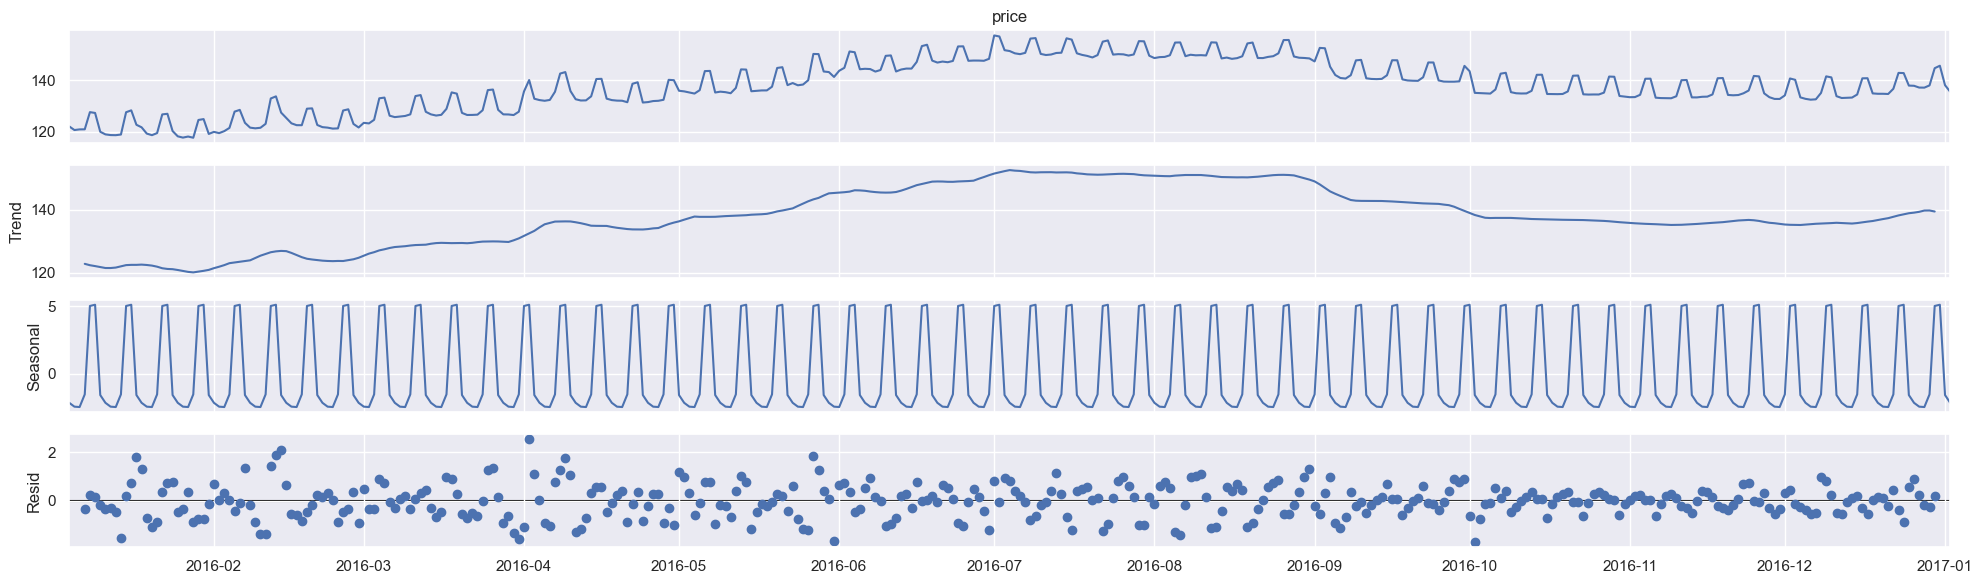

In [31]:
plt.rcParams["figure.figsize"] = (20, 6)

avg_price_per_date = calendar.groupby("date")["price"].mean()
result = seasonal_decompose(avg_price_per_date, model='additive')
result.plot()
plt.show()

As shown in the figure above, the seasonal decomposition of the price data reveals distinct patterns in the trend, seasonal, and residual components. The trend component captures the long-term price changes over time, showing a gradual increase from January to July, followed by a decline towards the end of the year. This trend aligns with the overall price trend observed in the previous analysis, indicating a consistent seasonal pattern in Seattle's Airbnb market.

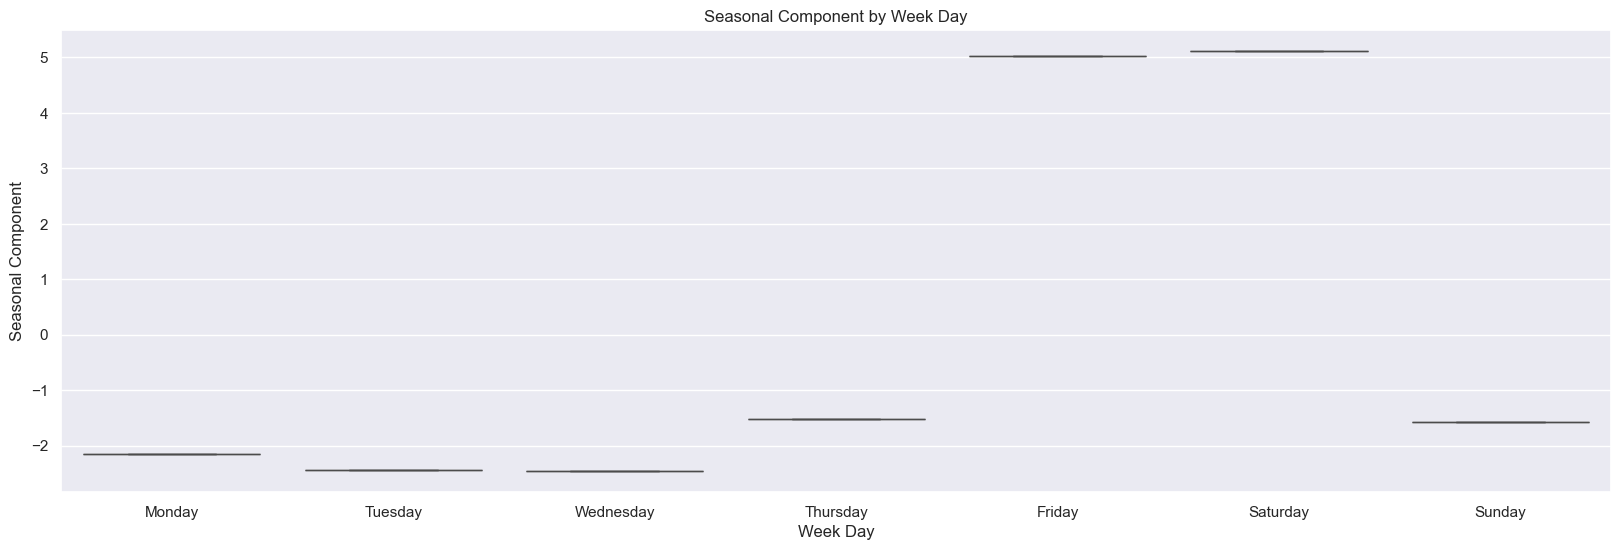

In [32]:
seasonal = result.seasonal.copy().to_frame().reset_index()

seasonal["week_day"] = seasonal["date"].dt.day_name()

plt.subplots(figsize=(20, 6))

sns.boxplot(
    data=seasonal.groupby("week_day")["seasonal"].mean().to_frame(),
    x="week_day",
    y="seasonal",
    order=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)
plt.title("Seasonal Component by Week Day")
plt.xlabel("Week Day")
plt.ylabel("Seasonal Component")
plt.show()

The seasonal component highlights the periodic price fluctuations that occur within each weeks since the boxplot shows the average seasonal price changes for each day of the week. The data indicates that prices are generally higher on weekends (Friday and Saturday) compared to weekdays (Sunday to Thursday), reflecting the typical demand patterns in the short-term rental market. This weekly seasonality suggests that hosts may adjust their prices based on the day of the week to capitalize on higher demand during weekends.

Finally, the residual component represents the random fluctuations or noise in the price data that cannot be explained by the trend or seasonal effects. This residual component captures the unexplained variability in prices, which may be influenced by external factors, market dynamics, or individual listing characteristics.

But does this seasonal trend apply to all property types? By jointly analyzing the seasonal price trends for different property types, we can identify any variations or similarities in pricing behavior across the entire home/apartment, private room, and shared room categories.

In [33]:
joined_calendar = calendar.join(
    listings, on="listing_id", how="inner", lsuffix="_calendar"
)

joined_calendar.head()

,listing_id,date,available,price_calendar,host_id,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,property_type_group
0,241032,2016-01-04,True,85.0,956883,"Seattle, Washington, United States",within a few hours,0.96,1.0,False,...,10.0,9.0,10.0,False,moderate,False,False,2,4.07,Apartment
1,241032,2016-01-05,True,85.0,956883,"Seattle, Washington, United States",within a few hours,0.96,1.0,False,...,10.0,9.0,10.0,False,moderate,False,False,2,4.07,Apartment
2,241032,2016-01-06,False,NaN,956883,"Seattle, Washington, United States",within a few hours,0.96,1.0,False,...,10.0,9.0,10.0,False,moderate,False,False,2,4.07,Apartment
3,241032,2016-01-07,False,NaN,956883,"Seattle, Washington, United States",within a few hours,0.96,1.0,False,...,10.0,9.0,10.0,False,moderate,False,False,2,4.07,Apartment
4,241032,2016-01-08,False,NaN,956883,"Seattle, Washington, United States",within a few hours,0.96,1.0,False,...,10.0,9.0,10.0,False,moderate,False,False,2,4.07,Apartment


To further investigate the seasonal trends, we can break down the price data by property type to see if different property categories exhibit similar seasonal patterns. By comparing the average prices for apartments and houses, we can identify any divergences in seasonal trends between these two property types. We should also consider room type to see if there are any significant differences in pricing behavior based on the type of accommodation offered.

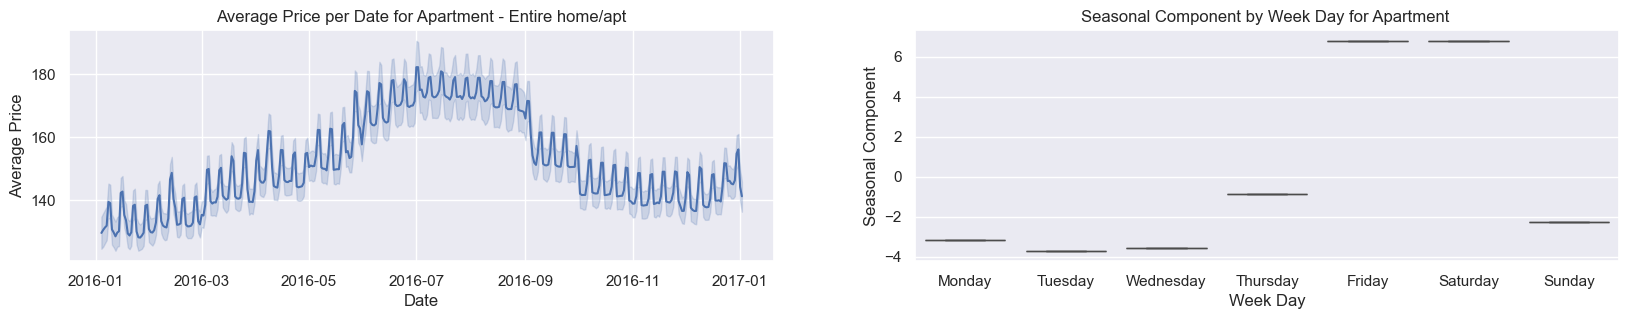

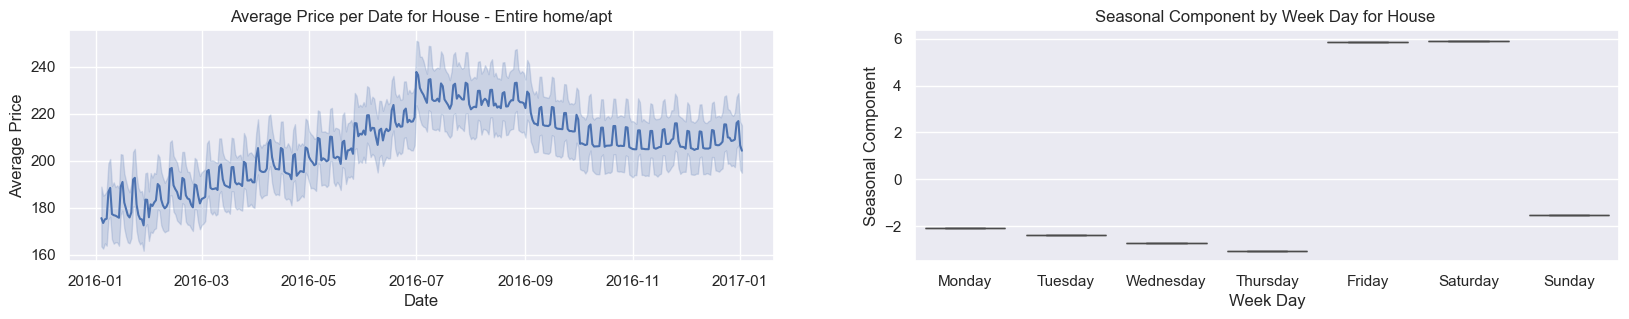

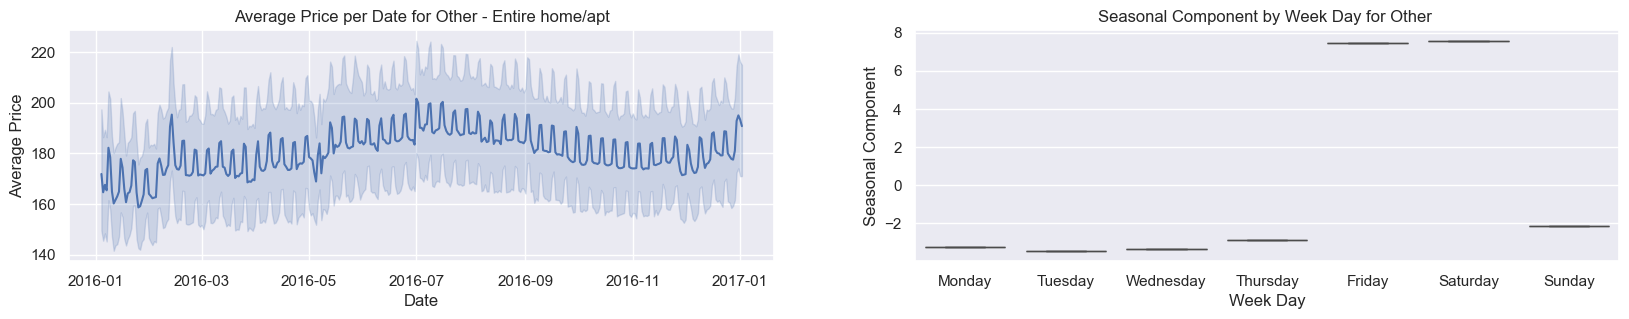

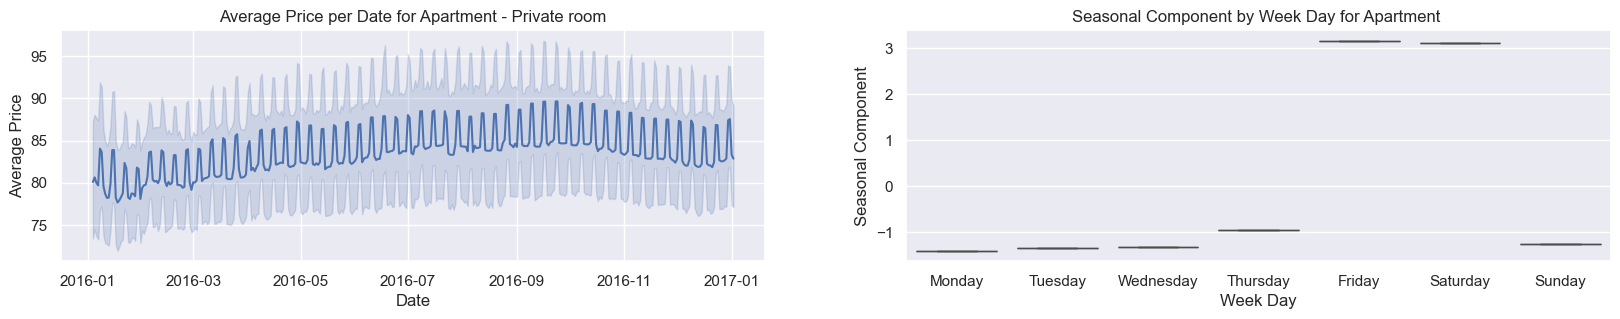

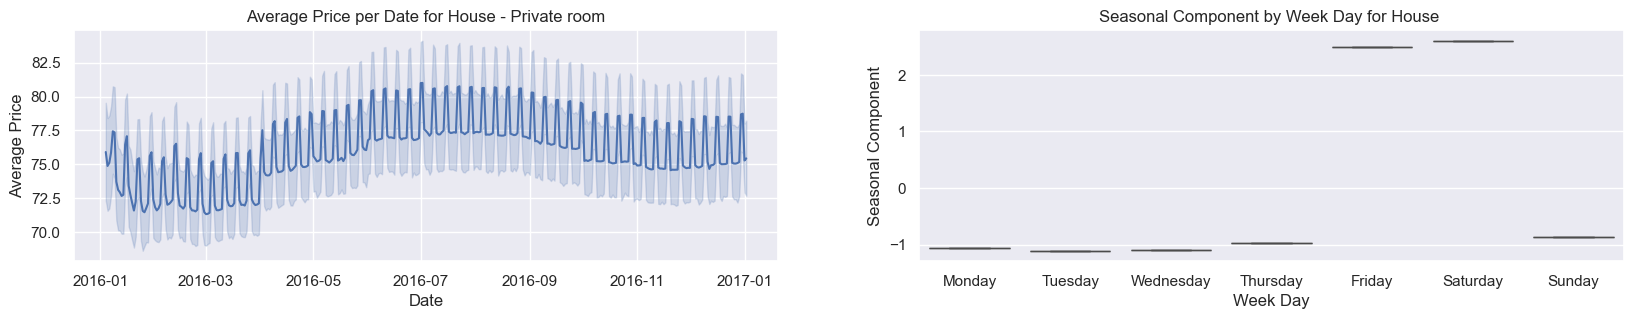

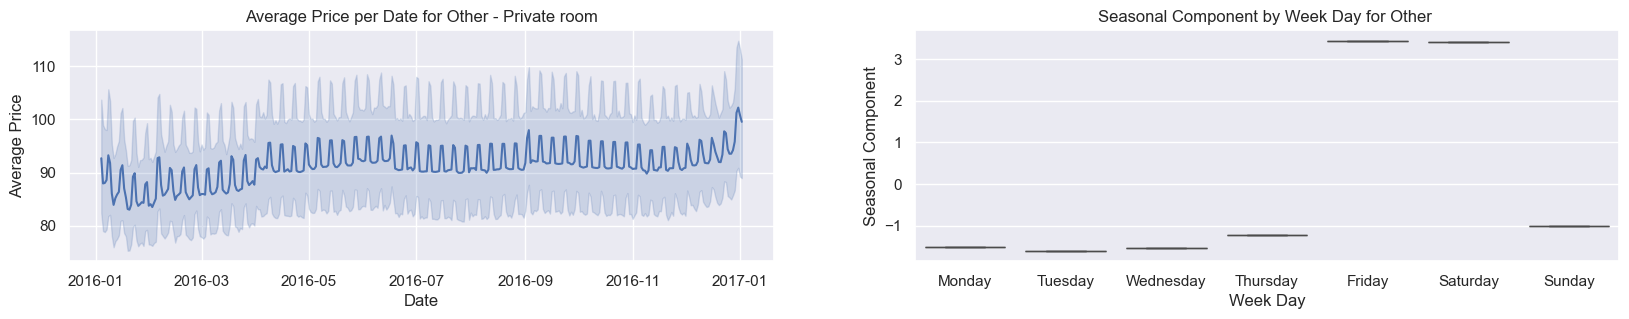

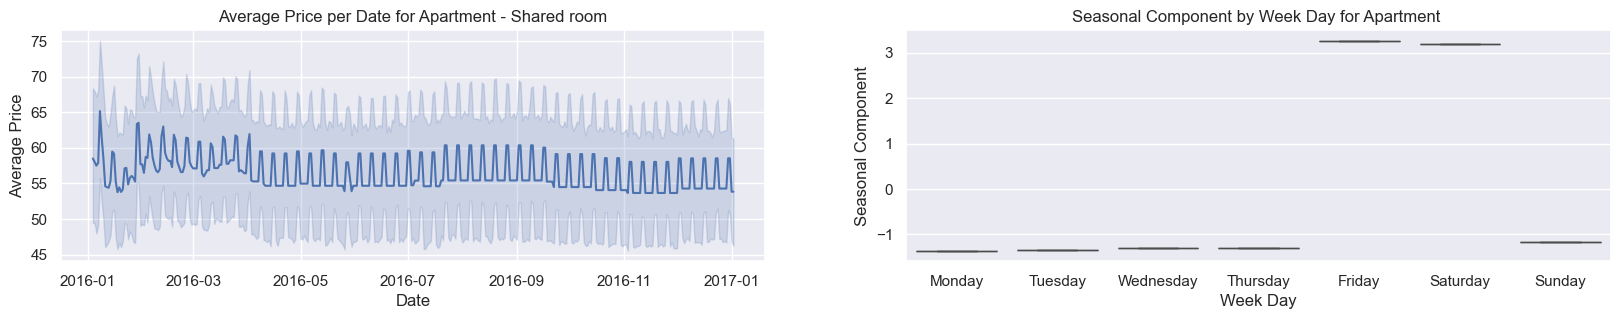

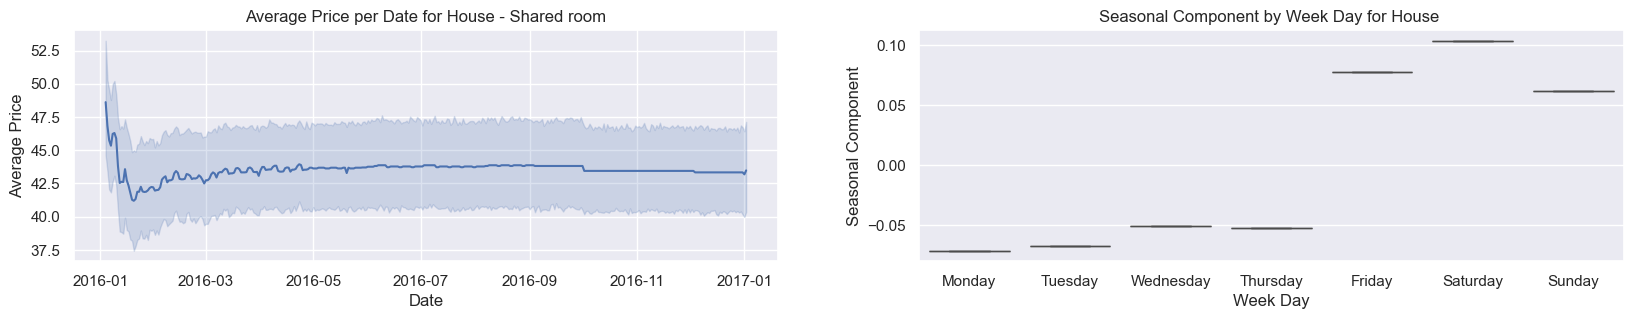

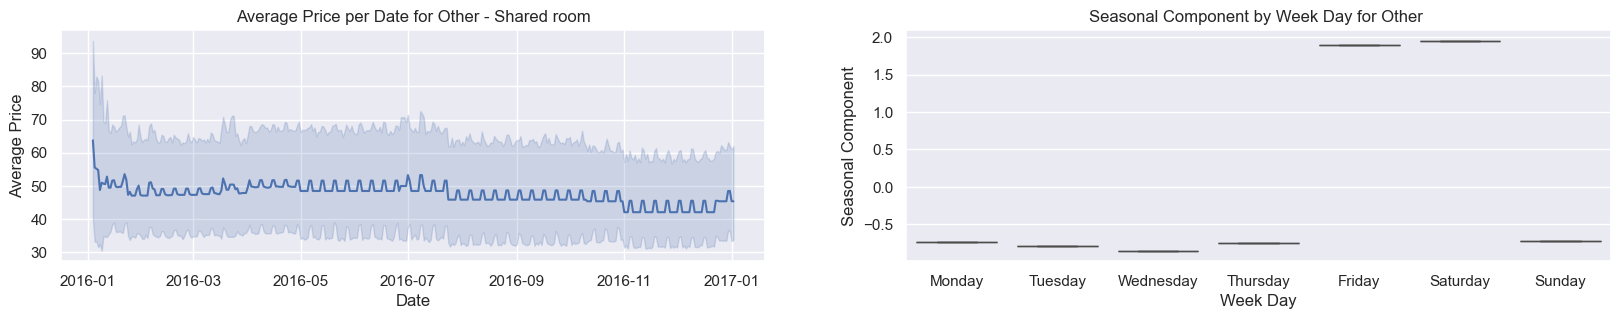

In [34]:
for room_type in listings["room_type"].unique():
    for property_type_group in listings["property_type_group"].unique():
        fig, axs = plt.subplots(1, 2, figsize=(20, 3))

        avg_price_per_date = (
            joined_calendar[
                (joined_calendar["property_type_group"] == property_type_group)
                & (joined_calendar["room_type"] == room_type)
            ]
            .groupby("date")["price_calendar"]
            .mean().dropna()
        )
        sns.lineplot(
            data=joined_calendar[
                (joined_calendar["property_type_group"] == property_type_group)
                & (joined_calendar["room_type"] == room_type)
            ],
            x="date",
            y="price_calendar",
            ax=axs[0],
        )

        axs[0].title.set_text(f"Average Price per Date for {property_type_group} - {room_type}")
        axs[0].set_xlabel("Date")
        axs[0].set_ylabel("Average Price")

        result = seasonal_decompose(avg_price_per_date, model='additive')

        seasonal = result.seasonal.copy().to_frame().reset_index()

        seasonal["week_day"] = seasonal["date"].dt.day_name()
        sns.boxplot(
            data=seasonal.groupby("week_day")["seasonal"].mean().to_frame(),
            x="week_day",
            y="seasonal",
            order=[
                "Monday",
                "Tuesday",
                "Wednesday",
                "Thursday",
                "Friday",
                "Saturday",
                "Sunday",
            ],
            ax=axs[1],
        )
        axs[1].title.set_text(f"Seasonal Component by Week Day for {property_type_group} ")
        axs[1].set_xlabel("Week Day")
        axs[1].set_ylabel("Seasonal Component")
        plt.show()

So we could see the weekly seasonality also indicates that prices tend to be higher on weekends, reflecting the typical demand patterns in the short-term rental market.

The differences in seasonal trends between room types are more pronounced, with entire homes/apartments showing the most significant price fluctuations throughout the year. Private rooms exhibit a more stable price pattern, with less pronounced seasonal effects, while shared rooms have the lowest overall price levels and minimal seasonal variation. These distinctions suggest that the type of accommodation offered (entire home, private room, or shared room) plays a crucial role in determining price dynamics and seasonal trends in the Seattle Airbnb market.

# Conclusion

In conclusion, the analysis of the Seattle Airbnb dataset has provided valuable insights into the property type popularity, pricing trends, and seasonal patterns in the short-term rental market. By addressing key business questions and leveraging data-driven methodologies, we have uncovered important patterns and trends that can inform strategic decision-making for Airbnb and its stakeholders.

The analysis revealed the following key findings:

- The most popular property types in Seattle are 'House' and 'Apartment', which account for around 45% of the total listings each. The 'Other' category includes a variety of less common property types, with no single type dominating the group.

- The distribution of property types varies slightly across different neighborhoods, with apartments being more prevalent in urban areas like Capitol Hill and Downtown, while houses are more common in suburban neighborhoods like Seward Park and West Seattle.

- Entire homes/apartments tend to have the highest and most variable prices, offering guests exclusivity and privacy at a premium. Private rooms represent a middle ground, providing a more affordable option without sacrificing too much in terms of personal space. Shared rooms are the budget-friendly alternative, appealing to travelers comfortable with shared living spaces and minimal privacy.

- Seasonal analysis of price data revealed a clear seasonal pattern in Seattle's short-term rental market, with prices peaking during the summer months and declining towards the end of the year. Weekly seasonality also indicates that prices tend to be higher on weekends, reflecting typical demand patterns in the short-term rental market.

- Differences in seasonal trends between property types and room types were observed, with entire homes/apartments showing the most significant price fluctuations throughout the year. Private rooms exhibited a more stable price pattern, while shared rooms had the lowest overall price levels and minimal seasonal variation.

By leveraging these insights, Airbnb can optimize its pricing strategies, enhance property offerings, and improve guest experiences to drive growth and profitability in the Seattle market. The data-driven approach presented in this analysis can serve as a foundation for further research and decision-making, enabling Airbnb to stay competitive and responsive to market trends in the dynamic short-term rental industry.